<b>Name: Aman Kumar</b> <br>
<b>Hawk Id: A20538809</b> <br>
<b>CS 512 (Computer Vision)</b> <br>
<b>Fall'24</b>

# Problem 1
<b>Add Gaussian Noise and Compute SNR</b><br>
<b>Task: </b>Load a grayscale image and generate 10 noisy versions by adding Gaussian noise with
a fixed standard deviation and zero mean. Compute the noise variance by calculating the pixel-wise standard deviation across the 10 noisy images (without directly accessing the noise itself). Compute the signal power as the variance (square of the standard deviation) of the original grayscale image. Finally, calculate the SNR in dB using the ratio of the signal power to the noise power.

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Load the image and convert ot grayscale
image = cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)

image = image.astype(np.float32) # Convert ot float for precise calculations

# Parameters for Gaussian noise
std_dev = 20 # Known standard deviation for Gaussian noise mean = 0 # Mean of the Gaussian noise
mean = 0
num_noisy_images = 10 # Number of noisy images to generate

# Generate 10 noisy versions of the grayscale image noisy_images = []
noisy_images = []
for i in range (num_noisy_images):
    noise = np.random.normal(mean, std_dev, image.shape).astype(np.float32) 
    noisy_image = np.clip(image + noise, 0, 255) # Clip values to be in valid range noisy_images. append (noisy_image)
    noisy_images.append(noisy_image)



# Compute the noise power as the mean of the noise variance
noise_variance = np.var(noisy_images, axis=0)
noise_power = np.mean(noise_variance)
print(f"noise power as the mean of the noise variance is : {noise_power}")

# Compute the signal power as the variance of the original image 
signal_power = np.var(image)
print(f"Signal power as the variance of the original image is : {signal_power}")

# Compute the SNR in decibels (dB)

snr_in_db = 10 * np.log10(signal_power / noise_power)
print(f"SNR in decibels (dB) is : {snr_in_db} dB")

noise power as the mean of the noise variance is : 355.45428466796875
Signal power as the variance of the original image is : 2981.994873046875
SNR in decibels (dB) is : 9.237231016159058 dB


# Problem 2
<b>Implement a Convolution Filter for Smoothing</b><br>
<b>Task:</b> Load a grayscale image. Implement a basic 3x3 convolution filter. Pad the image with zeros so that the convolution result has the same dimensions as the input. Define a basic
3x3 smoothing filter. Apply the filter ot a grayscale image using your function and OpenCV's function, and compare the execution time. Display the original and smoothed images. Explain the performance difference between your implementation and OpenCV's convolution.

Manual convolution time:  0.62420 seconds
OpenCV convolution time (zero padding): 0.00025 seconds


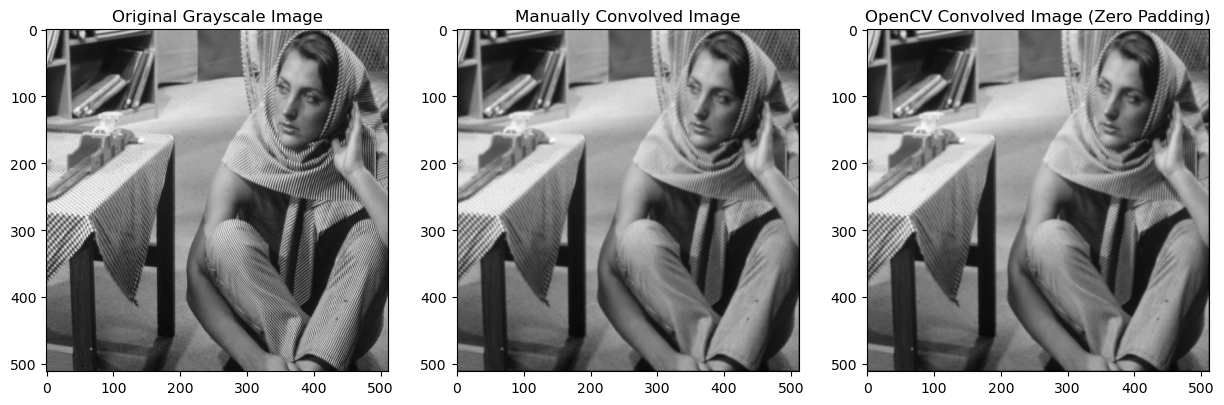

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import time


# Function for manual convolution using zero padding
def manual_convolution (image, kernel): 
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Calculate padding sizes
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Pad the image with zeros
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    
    # Create an output image of the same size as the input image
    output_image = np.zeros_like(image)

    # Perform the convolution
    for i in range(image_height):
        for j in range(image_width):
            # Extract the region of interest
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            # Perform element-wise multiplication and sum the results
            output_image[i, j] = np.sum(region * kernel)

    
    return output_image


# Load the image and convert it to grayscale
image = cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)


# Define a 3x3 averaging filter (kernel) 
kernel = np.ones((3, 3)) / 9.0


# Time the convolution implementations
start_manual = time.time()
smoothed_image_manual = manual_convolution(image, kernel)
end_manual = time.time()
start_opencv = time.time()
smoothed_image_opencv = cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_CONSTANT) 
end_opencv = time.time()
print(f"Manual convolution time: {end_manual - start_manual: .5f} seconds")
print(f"OpenCV convolution time (zero padding): {end_opencv - start_opencv:.5f} seconds")


# Display the original, manually convolved, and OpenCV-convolved images 
plt.figure(figsize=(15, 5))
plt.subplot (1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image") 
plt.subplot(1, 3, 2)
plt.imshow(smoothed_image_manual, cmap='gray') 
plt.title("Manually Convolved Image") 
plt.subplot(1, 3, 3)
plt.imshow(smoothed_image_opencv, cmap='gray')
plt.title("OpenCV Convolved Image (Zero Padding)") 
plt.show()

# Explanation of Problem 2

The time taken by manual Convolution is much higher than that of OpenCv convolution